In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [8]:
df = pd.read_csv('twoSpirals.txt', header=None, names=['X1', 'X2', 'Label'], sep="\s+")
print(df.head())

        X1       X2  Label
0  10.5192  -0.7170   -1.0
1   0.9987  -9.9681   -1.0
2   3.5763   8.3756   -1.0
3   1.9236 -10.6448   -1.0
4   8.1583  -5.9066   -1.0


<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
/var/folders/mg/w4cw2nc563q822jj2x4x_qqh0000gn/T/ipykernel_1639/3554860691.py:1: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv('twoSpirals.txt', header=None, names=['X1', 'X2', 'Label'], sep="\s+")


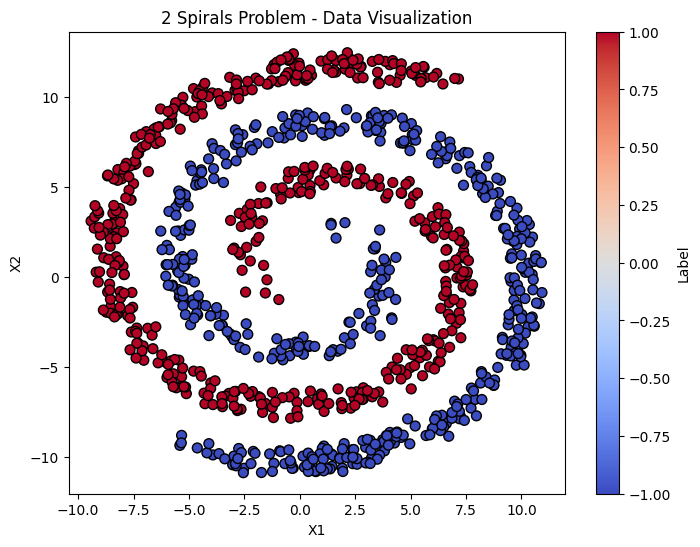

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(df['X1'], df['X2'], c=df['Label'], cmap='coolwarm', edgecolors='k', s=50)
plt.title('2 Spirals Problem - Data Visualization')
plt.xlabel('X1')
plt.ylabel('X2')
plt.colorbar(label='Label')
plt.show()


In [10]:
X = df[['X1', 'X2']].values
y = df['Label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Logistic Regression: {accuracy:.4f}")

Accuracy of Logistic Regression: 0.6633


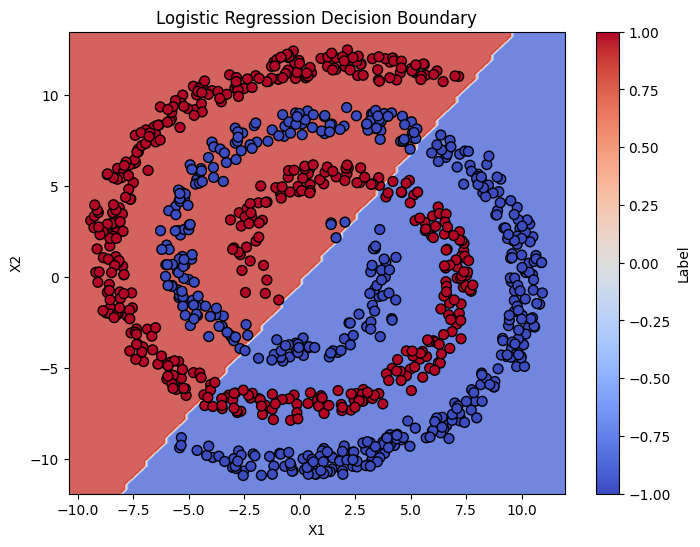

In [12]:
x_min, x_max = df['X1'].min() - 1, df['X1'].max() + 1
y_min, y_max = df['X2'].min() - 1, df['X2'].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))


Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
plt.scatter(df['X1'], df['X2'], c=df['Label'], cmap='coolwarm', edgecolors='k', s=50)
plt.title('Logistic Regression Decision Boundary')
plt.xlabel('X1')
plt.ylabel('X2')
plt.colorbar(label='Label')
plt.show()


In [13]:
X2 = np.sum(X**2, axis=1).reshape(-1, 1)  
DIST_euclid = X2 + X2.T - 2 * np.dot(X, X.T)

In [14]:
sigma = 3
K = np.exp(-DIST_euclid / (2 * sigma ** 2))

In [15]:
N = K.shape[0]
U = np.ones((N, N)) / N
Kn = K - np.dot(U, K) - np.dot(K, U) + np.dot(np.dot(U, K), U)

In [16]:
eigenvalues, eigenvectors = np.linalg.eigh(Kn)
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues_sorted = eigenvalues[sorted_indices]
eigenvectors_sorted = eigenvectors[:, sorted_indices]

In [17]:
XG_3 = np.dot(Kn, eigenvectors_sorted[:, :3])
XG_20 = np.dot(Kn, eigenvectors_sorted[:, :20])
XG_100 = np.dot(Kn, eigenvectors_sorted[:, :100])

print("Projection for top 3 dimensions:", XG_3[:5])
print("Projection for top 20 dimensions:", XG_20[:5])


Projection for top 3 dimensions: [[ 1.42465748 -4.4400933   3.32774257]
 [ 4.90606227  1.77023563 -3.89911482]
 [-4.19948617 -2.44233396 -3.09751692]
 [ 4.51735597  1.39477446 -3.68461308]
 [ 3.15279828 -2.21347754  0.35745527]]
Projection for top 20 dimensions: [[ 1.42465748 -4.4400933   3.32774257 -0.85673855  0.66770562 -1.85775102
   1.56732551 -1.89158575  0.82878996 -0.80677106  1.18826758 -0.66525105
   1.32986514 -0.35867188  0.19680341 -0.23658954  0.05852391 -0.02169397
   0.43846409 -0.67067673]
 [ 4.90606227  1.77023563 -3.89911482  0.02352699 -2.81796937  0.17070346
   1.65917667 -1.58836139 -0.2151456  -1.21979494 -0.48446615  0.741526
   0.59947169  0.62657798  0.07680967  0.25960844 -0.35742646 -0.30809713
  -0.23651426  0.20754097]
 [-4.19948617 -2.44233396 -3.09751692  2.97830698  0.48147198  2.42509868
   0.02225597  0.27746731  1.6314628   0.3447147  -0.05990189 -0.04229045
   1.1478843  -0.01812826  0.06819362  0.63935649  0.71272128  0.06954831
   0.09521717 -0.14

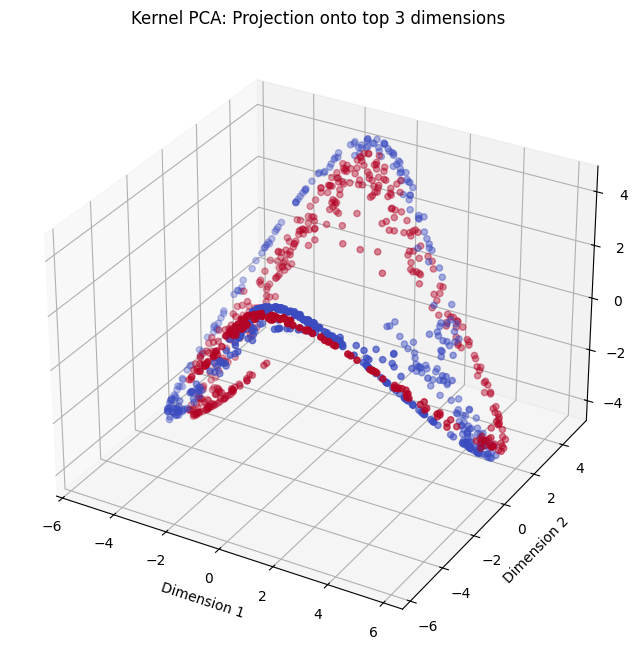

In [18]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(XG_3[:, 0], XG_3[:, 1], XG_3[:, 2], c=y, cmap='coolwarm')
ax.set_title('Kernel PCA: Projection onto top 3 dimensions')
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')
plt.show()


In [19]:
X_train, X_test, y_train, y_test = train_test_split(XG_3, y, test_size=0.3, random_state=42)

log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Logistic Regression on Kernelized Data (top 3 dimensions): {accuracy:.4f}")


Accuracy of Logistic Regression on Kernelized Data (top 3 dimensions): 0.6567


In [22]:
X_train, X_test, y_train, y_test = train_test_split(XG_20, y, test_size=0.3, random_state=42)

log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Logistic Regression on Kernelized Data (top 3 dimensions): {accuracy:.4f}")


Accuracy of Logistic Regression on Kernelized Data (top 3 dimensions): 0.8767


In [23]:
X_train, X_test, y_train, y_test = train_test_split(XG_100, y, test_size=0.3, random_state=42)

log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Logistic Regression on Kernelized Data (top 3 dimensions): {accuracy:.4f}")


Accuracy of Logistic Regression on Kernelized Data (top 3 dimensions): 0.9833


## Verification with SKLearn Implementation

        X1       X2  Label
0  10.5192  -0.7170   -1.0
1   0.9987  -9.9681   -1.0
2   3.5763   8.3756   -1.0
3   1.9236 -10.6448   -1.0
4   8.1583  -5.9066   -1.0
Transformed Shape: (1000, 20)
Accuracy: 0.661
RMSE: 1.164474130240771


<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
/var/folders/mg/w4cw2nc563q822jj2x4x_qqh0000gn/T/ipykernel_1639/1333590905.py:9: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv('twoSpirals.txt', header=None, names=['X1', 'X2', 'Label'], sep="\s+")


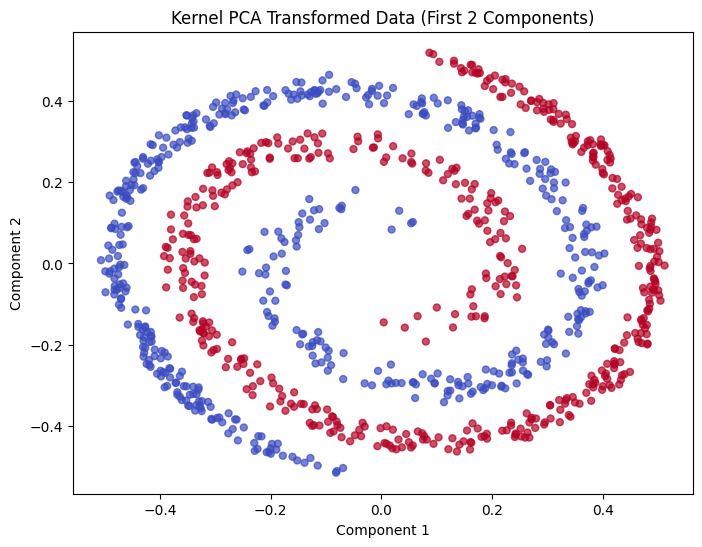

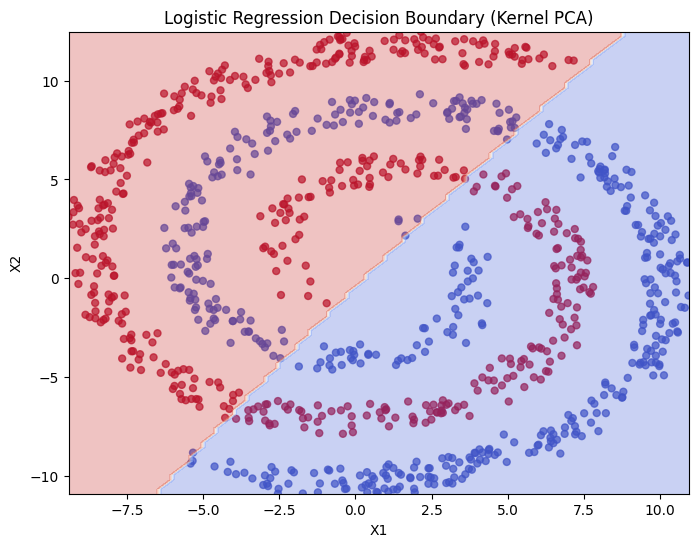

In [26]:
import pandas as pd
import numpy as np
from sklearn.decomposition import KernelPCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('twoSpirals.txt', header=None, names=['X1', 'X2', 'Label'], sep="\s+")
print(df.head())

X = df[['X1', 'X2']].values
y = df['Label'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

sigma = 3
kpca = KernelPCA(n_components=20, kernel='rbf', gamma=1/(2 * sigma**2))
X_kpca = kpca.fit_transform(X_scaled)
print("Transformed Shape:", X_kpca.shape)

clf = LogisticRegression()
clf.fit(X_kpca, y)

y_pred = clf.predict(X_kpca)
accuracy = accuracy_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
print(f"Accuracy: {accuracy}")
print(f"RMSE: {rmse}")

plt.figure(figsize=(8, 6))
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y, cmap='coolwarm', marker='o', s=25, alpha=0.7)
plt.title("Kernel PCA Transformed Data (First 2 Components)")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', marker='o', s=25, alpha=0.7)

xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
                     np.linspace(X[:, 1].min(), X[:, 1].max(), 100))

grid_points = np.c_[xx.ravel(), yy.ravel()]
grid_points_scaled = scaler.transform(grid_points)
grid_points_kpca = kpca.transform(grid_points_scaled)

Z = clf.predict(grid_points_kpca)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.title("Logistic Regression Decision Boundary (Kernel PCA)")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()
